## Раздел IV-1. Модель на базе решающих деревьев (Decision Tree)


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime

In [2]:
# загрузим очищенный набор 
orders = pd.read_csv('orders_3-1.csv', low_memory=False, dtype={'CUST_ZIP_C': object})

In [3]:
# импортируем из вспомогателього модуля 'my_utils' класс для работы с orders
from my_utils import Order

# создадим объект
obj_orders = Order(orders)

### a) подготовка данных  для работы агоритма Decision Tree

In [4]:
# закодируем категориальные переменные в их цифровое представление

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#le.fit(orders.CUST_CITY)
orders.CUST_CITY = le.fit_transform(orders.CUST_CITY)
orders.CUST_NAM = le.fit_transform(orders.CUST_NAM)
orders.CUST_CAT = le.fit_transform(orders.CUST_CAT)

orders.CUST_CITY = orders.CUST_CITY.astype('category')
orders.CUST_NAM = orders.CUST_NAM.astype('category')
orders.CUST_CAT = orders.CUST_CAT.astype('category')

In [5]:
#### разделим выборку на обучающий и тестовый наборы (80%, 20%)
train = orders.iloc[:int(len(orders)*.8)]
test = orders [train.shape[0] :]

print 'обучающий набор: ', train.shape[0] 
print 'тестовый набор:  ', test.shape[0]

обучающий набор:  91834
тестовый набор:   22959


In [45]:
# выделим в выборках целевую переменную (SA_HDR_AMT) 
y_train = train.SA_HDR_AMT
X_train = train.drop('SA_HDR_AMT', axis=1)

y_test = test.SA_HDR_AMT
X_test = test.drop('SA_HDR_AMT', axis=1)

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(91834, 18) (91834,)
(22959, 18) (22959,)


### б) настроим гиперпараметры и обучим модель на выборке X_train

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
dt_model = DecisionTreeRegressor(random_state=41)

In [31]:
# в качестве параметра настройки модели возьмем максимальную глубину 
# дерева max_depth и по сетке  перебора параметров найдем наилучшее значение
# при различных значениях кросс-валидации

depth = np.array([5, 10, 20, 30, 60, 100])
cvs = np.array([3,5,7])
for cv in cvs:
    grid = GridSearchCV(estimator=dt_model, param_grid=dict(max_depth = depth),
                    n_jobs=-1, scoring='r2', cv=cv)
    grid.fit(X_train, y_train);

In [46]:
print 'наилучшее обучение достигнуто при глубине дерева = {1} с r2 = {0}'.format(grid.best_score_,
                                                                       grid.best_estimator_.max_depth)


наилучшее обучение достигнуто при глубине дерева = 10 с r2 = 0.938009906514


### в) построим прогноз и оценим качество модели по критерию r2

In [47]:
y_pred = grid.predict(X_test)   # построим прогнозные значения на тесте
y_true = np.array(y_test)       # истинные значения на тесте

In [48]:
from sklearn.metrics import r2_score
print 'коэф.детерминации r2 = {}'.format(r2_score(y_true, y_pred))

коэф.детерминации r2 = 0.908462651702


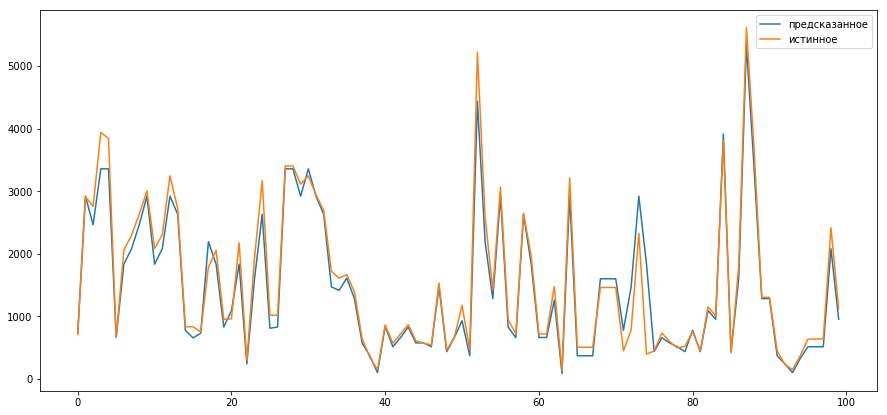

In [49]:
plt.figure(figsize=(15,7))
plt.plot(y_pred[1000:1100], label=u'предсказанное' )
plt.plot(y_true[1000:1100], label=u'истинное')
plt.legend();

## Вывод.
Модель на алгоритме решающих деревьев показала приемлемое качество прогноза на тестовой выборке (0.908) и выше по качеству, чем базовоя модель

_В целом, базовую модель можно в дальнейшем не рассматривать_